# **Inicio**

Analise do dataset encontrado no Kaggle: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Artigos importantes: http://media-publisher.eu/wp-content/uploads/2021/01/5-6-2020.pdf


--------------------------------------------------------------------

Data description
There are 3 types of input features:

1. Objective: factual information;
2. Examination: results of medical examination;
3. Subjective: information given by the patient.

Features:

- Age | Objective Feature | age | int (days)

- Height | Objective Feature | height | int (cm) |

- Weight | Objective Feature | weight | float (kg) |

- Gender | Objective Feature | gender | categorical code |

- Systolic blood pressure | Examination Feature | ap_hi | int |

- Diastolic blood pressure | Examination Feature | ap_lo | int |

- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

- Smoking | Subjective Feature | smoke | binary |

- Alcohol intake | Subjective Feature | alco | binary |

- Physical activity | Subjective Feature | active | binary |

- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


# **1 - Importando as bibliotecas e o dataset**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Lendo o arquivo 
base = pd.read_csv("/content/drive/MyDrive/Projeto 1 - Residência/cardio.csv", sep=';')

In [3]:
base.shape

(70000, 13)

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
base.duplicated().value_counts()

False    70000
dtype: int64

# **2 - Pré-processamento**

No estudo realizado pela equipe, o que interessa são apenas as variáveis: idade, sexo, diabetes, colesterol e se teve doença cardiaca ou não. Essas são as caracteristicas em comum nos datasets utilizados. 

In [7]:
base.drop(columns=['id', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active'], inplace=True)

In [8]:
print(base.isnull().sum())

age            0
gender         0
cholesterol    0
gluc           0
cardio         0
dtype: int64


Não há dados nulos em nenhuma das colunas 

In [9]:
#verificando a simetria entre os dados
base.skew()

age           -0.307055
gender         0.630960
cholesterol    1.587123
gluc           2.397462
cardio         0.001200
dtype: float64

A idade está expressa em dias, vamos transformá-la em anos.

In [10]:
#transformando a idade em anos
base['age'] = base['age'] // 365

Além disso, substituiremos os valores da coluna gender de 1 - women e 2 - men para 0 - men e 1 - women

In [11]:
base["gender"] = base["gender"].replace(2, 0)

In [12]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          70000 non-null  int64
 1   gender       70000 non-null  int64
 2   cholesterol  70000 non-null  int64
 3   gluc         70000 non-null  int64
 4   cardio       70000 non-null  int64
dtypes: int64(5)
memory usage: 2.7 MB


In [13]:
base.head()

,age,gender,cholesterol,gluc,cardio
0,50,0,1,1,0
1,55,1,3,1,1
2,51,1,3,1,1
3,48,0,1,1,1
4,47,1,1,1,0


In [14]:
base.describe().round(2)

,age,gender,cholesterol,gluc,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.0
mean,52.84,0.65,1.37,1.23,0.5
std,6.77,0.48,0.68,0.57,0.5
min,29.00,0.00,1.00,1.00,0.0
25%,48.00,0.00,1.00,1.00,0.0
50%,53.00,1.00,1.00,1.00,0.0
75%,58.00,1.00,2.00,1.00,1.0
max,64.00,1.00,3.00,3.00,1.0


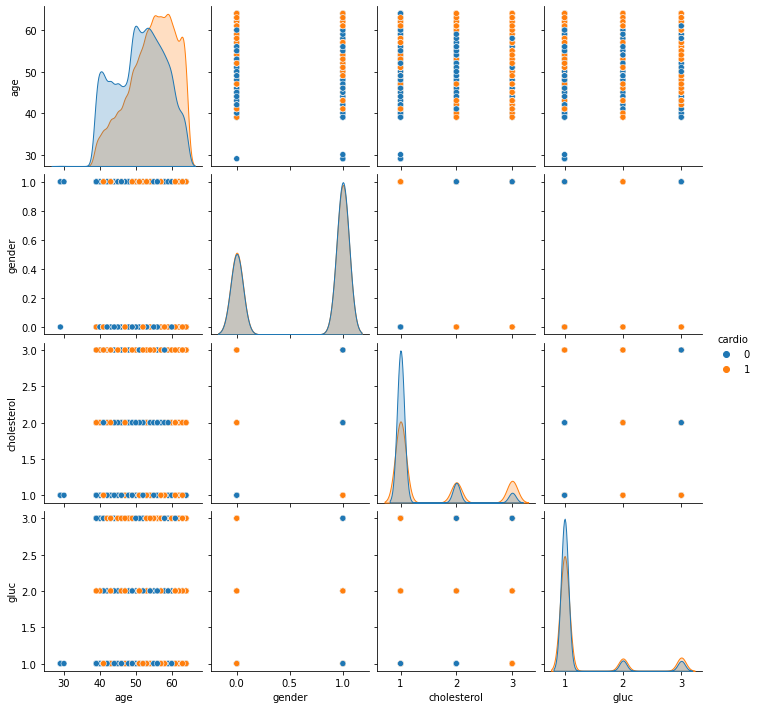

In [15]:
# distribuição das variáveis
sns.pairplot(base, hue='cardio')

In [16]:
#Discretizando a idade em Adultos e Idosos
base['age_disct'] = pd.cut(base['age'], [29, 59, 65], labels=['Adulto','Idoso'])

As variáveis *gluc* e *cholesterol* apresentam 3 categorias. Vamos considerar as duas primeiras (valor 1 e 2) como não diabético e valor 3 como diabético. O mesmo para a coluna colesreol. Assim, as novas colunas: diabéitco e colestreol terão os valores 0 e 1.  

In [17]:
base['diabético'] = base['gluc'].apply(lambda x: 1 if x == 3 else 0)

In [18]:
base.drop('gluc', axis=1, inplace=True)

In [19]:
base.head(10)

,age,gender,cholesterol,cardio,age_disct,diabético
0,50,0,1,0,Adulto,0
1,55,1,3,1,Adulto,0
2,51,1,3,1,Adulto,0
3,48,0,1,1,Adulto,0
4,47,1,1,0,Adulto,0
5,60,1,2,0,Idoso,0
6,60,1,3,0,Idoso,0
7,61,0,3,1,Idoso,1
8,48,1,1,0,Adulto,0
9,54,1,1,0,Adulto,0


In [20]:
base['colesterol'] = base['cholesterol'].apply(lambda x: 1 if x == 3 else 0)

In [21]:
base.drop('cholesterol', axis=1, inplace=True)

In [22]:
base.head()

,age,gender,cardio,age_disct,diabético,colesterol
0,50,0,0,Adulto,0,0
1,55,1,1,Adulto,0,1
2,51,1,1,Adulto,0,1
3,48,0,1,Adulto,0,0
4,47,1,0,Adulto,0,0


In [23]:
dummy_variable_sex = pd.get_dummies(base['gender'])
dummy_variable_sex.rename(columns={0: 'homem', 1: 'mulher'}, inplace=True)
dummy_variable_sex.head()

,homem,mulher
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [24]:
dummy_variable_glic = pd.get_dummies(base['diabético'])
dummy_variable_glic.rename(columns={0: 'nao_diabetico', 1: 'diabetico'}, inplace=True)
dummy_variable_glic.head()

,nao_diabetico,diabetico
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [25]:
dummy_variable_col = pd.get_dummies(base['colesterol'])
dummy_variable_col.rename(columns={0: 'colesterol_baixo', 1: 'colesterol_alto'}, inplace=True)
dummy_variable_col.head()

,colesterol_baixo,colesterol_alto
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [26]:
dummy_variable_age = pd.get_dummies(base['age_disct'])
dummy_variable_age.rename(columns={'Adulto': 'adulto', 'Idoso': 'idoso'}, inplace=True)
dummy_variable_age.head()

,adulto,idoso
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [27]:
base = pd.concat([base, dummy_variable_sex, dummy_variable_glic, dummy_variable_col, dummy_variable_age], axis=1)

In [28]:
base.head()

,age,gender,cardio,age_disct,diabético,colesterol,homem,mulher,nao_diabetico,diabetico,colesterol_baixo,colesterol_alto,adulto,idoso
0,50,0,0,Adulto,0,0,1,0,1,0,1,0,1,0
1,55,1,1,Adulto,0,1,0,1,1,0,0,1,1,0
2,51,1,1,Adulto,0,1,0,1,1,0,0,1,1,0
3,48,0,1,Adulto,0,0,1,0,1,0,1,0,1,0
4,47,1,0,Adulto,0,0,0,1,1,0,1,0,1,0


In [29]:
base.drop(columns=["gender", "colesterol", "diabético", "age_disct"], axis = 1, inplace=True)

In [30]:
base.head()

,age,cardio,homem,mulher,nao_diabetico,diabetico,colesterol_baixo,colesterol_alto,adulto,idoso
0,50,0,1,0,1,0,1,0,1,0
1,55,1,0,1,1,0,0,1,1,0
2,51,1,0,1,1,0,0,1,1,0
3,48,1,1,0,1,0,1,0,1,0
4,47,0,0,1,1,0,1,0,1,0


# **3 - Distribuição dos dados no conjunto**



In [31]:
#quantidade de homens e mulheres 0 - Mulheres // 1 - Homens
base['homem'].value_counts()

0    45530
1    24470
Name: homem, dtype: int64

In [32]:
#porcentagem por genero 0 - Mulheres // 1 - Homens
round(base['homem'].value_counts(normalize=True) * 100, 2)

0    65.04
1    34.96
Name: homem, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


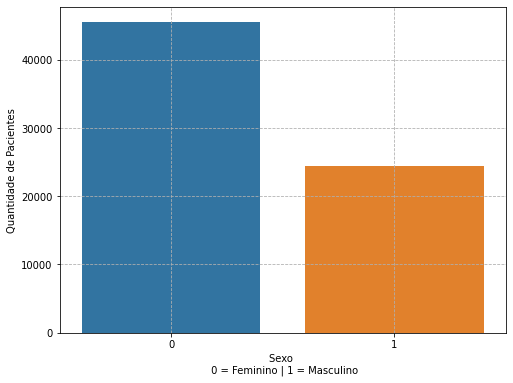

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(base['homem'])
sns.set_theme(style="darkgrid")
plt.grid(True, linestyle='--')
plt.xlabel('Sexo \n 0 = Feminino | 1 = Masculino')
plt.ylabel('Quantidade de Pacientes')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


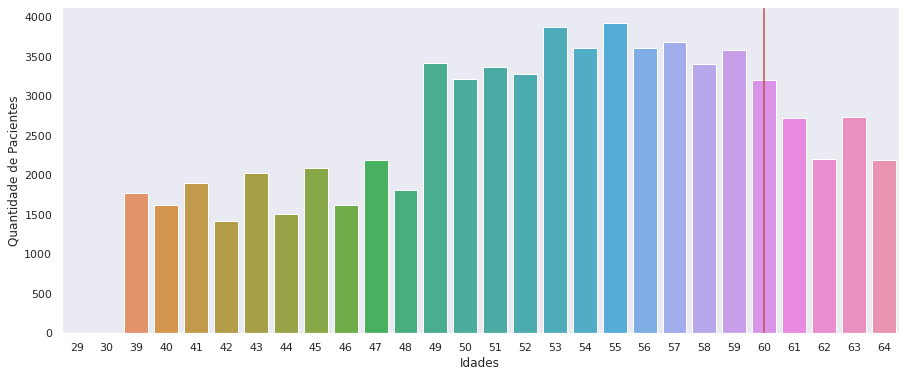

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(base['age'])
plt.grid(True, linestyle='')
plt.xlabel('Idades')
plt.ylabel('Quantidade de Pacientes')
plt.axvline(x = 23, color = 'r', label = 'axvline - full height')
plt.show()

In [35]:
base['idoso'].value_counts()

0    56950
1    13050
Name: idoso, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


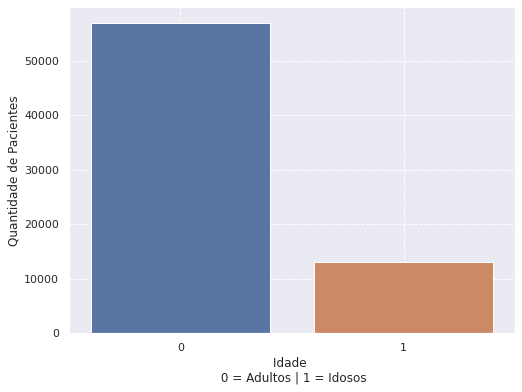

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(base['idoso'])
plt.grid(True, linestyle='--')
plt.xlabel('Idade \n 0 = Adultos | 1 = Idosos')
plt.ylabel('Quantidade de Pacientes')
plt.show()

In [37]:
# quantidade de ocrrencias com colesterol alto 
base['colesterol_alto'].value_counts()

0    61934
1     8066
Name: colesterol_alto, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


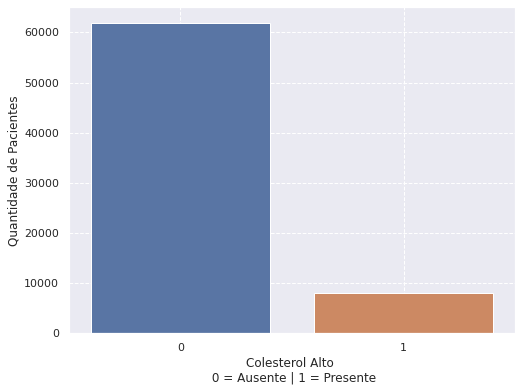

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(base['colesterol_alto'])
plt.grid(True, linestyle='--')
plt.xlabel('Colesterol Alto \n 0 = Ausente | 1 = Presente')
plt.ylabel('Quantidade de Pacientes')
plt.show()

In [39]:
base['diabetico'].value_counts()

0    64669
1     5331
Name: diabetico, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


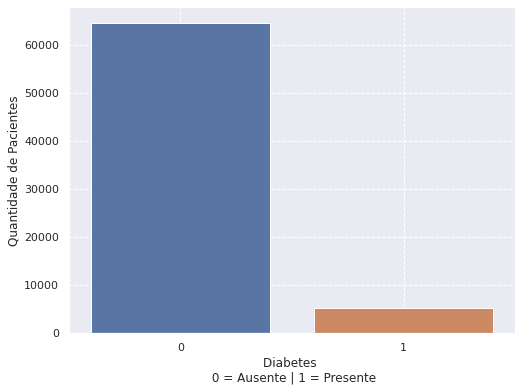

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(base['diabetico'])
plt.grid(True, linestyle='--')
plt.xlabel('Diabetes \n 0 = Ausente | 1 = Presente')
plt.ylabel('Quantidade de Pacientes')
plt.show()

In [41]:
base['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


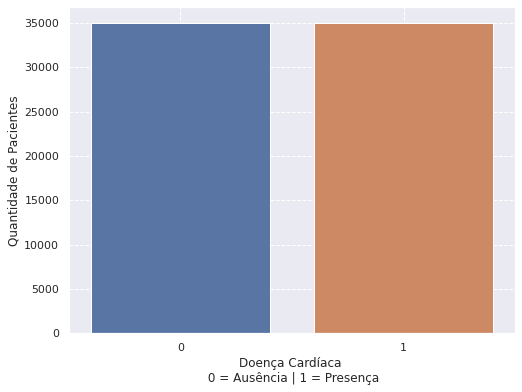

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(base['cardio'])
plt.grid(True, linestyle='--')
plt.xlabel('Doença Cardíaca \n 0 = Ausência | 1 = Presença')
plt.ylabel('Quantidade de Pacientes')
plt.show()

# **4 - Verificando as depedências entre as variáveis**

Vamos verificar a dependência entre as variáveis, utilizando o Chi-Square e o P-value, a partir da função chi2 do Sklearn. Essa verificação é recomendada para variáveis categóricas.

https://medium.com/data-hackers/estat%C3%ADstica-para-sele%C3%A7%C3%A3o-de-atributos-81bdc274dd2c


In [43]:
from sklearn.feature_selection import chi2

In [44]:
X = base.drop(['age', 'cardio'], axis=1) 
y = base.cardio

In [45]:
# Calculando Chi-Squared
chi_scores = chi2(X,y)

In [46]:
# Colocando label nos resultados para posterior plot
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

In [47]:
# Results
pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})

,Chi2,p-Value
homem,2.994229,8.356171e-02
mulher,1.609242,2.045984e-01
nao_diabetico,26.302163,2.919615e-07
diabetico,319.064828,2.315276e-71
colesterol_baixo,296.719094,1.708375e-66
colesterol_alto,2278.328834,0.000000e+00
adulto,346.616354,2.311993e-77
idoso,1514.590920,0.000000e+00


Podemos observar, por exemplo, as linhas colesterol_alto e idoso com uma alta dependência com a variável cardio que representa ausência ou presença de Doença Cardíaca. Mas, vamos agrupar um pouco mais as caracteristicas dos pacientes e verificar os valores.  

### Agrupando os pacientes

In [48]:
homem = base['homem'] == 1
mulher = base['mulher'] == 1
idoso = base['idoso'] == 1
adulto = base['adulto'] == 1
diabetes = base['diabetico'] == 1
n_diabetes = base['nao_diabetico'] == 1

In [49]:
h_adulto = base[homem & adulto]
h_idoso = base[homem & idoso]
h_diab = base[homem & diabetes]
h_ndiab = base[homem & n_diabetes]

In [50]:
h_adulto_diab = base[homem & adulto & diabetes]
h_ido_diab = base[homem & idoso & diabetes ]
h_adulto_ndiab = base[homem & adulto & n_diabetes]
h_idoso_ndiab = base[homem & idoso & n_diabetes]

In [51]:
m_adulto = base[mulher & adulto]
m_idoso = base[mulher & idoso]
m_diab = base[mulher & diabetes]
m_ndiab = base[mulher & n_diabetes]

In [52]:
m_adulto_diab = [mulher & adulto & diabetes]
m_ido_diab = [mulher & idoso & diabetes ]
m_adulto_ndiab = [mulher & adulto & n_diabetes]
m_idoso_ndiab = [mulher & idoso & n_diabetes]

Todos os perfis consideram os pacientes com colesterol alto.

In [53]:
#Homem 
base['Perfil_M'] = np.where(homem  & base['colesterol_alto']==1, 1, 0)
base['Perfil_MA'] = np.where(homem & adulto & base['colesterol_alto']==1, 1, 0)
base['Perfil_MI'] = np.where(homem & idoso & base['colesterol_alto']==1, 1, 0)

In [54]:
base['Perfil_MI']. value_counts()

0    69251
1      749
Name: Perfil_MI, dtype: int64

In [55]:
round(base['Perfil_MI'].value_counts(normalize=True) * 100, 2)

0    98.93
1     1.07
Name: Perfil_MI, dtype: float64

In [56]:
total_h_idoso = h_idoso.count()
total_h_idoso[0]

4673

In [57]:
total_h_idoso[0]/base['Perfil_MI']. value_counts()[1]

6.238985313751669

In [58]:
base['Perfil_MD'] = np.where(homem & diabetes & base['colesterol_alto']==1, 1, 0)
base['Perfil_MAD'] = np.where(homem & adulto & diabetes & base['colesterol_alto']==1, 1, 0)
base['Perfil_MID'] = np.where(homem & idoso & diabetes & base['colesterol_alto']==1, 1, 0)
base['Perfil_MAN'] = np.where(homem & adulto & n_diabetes & base['colesterol_alto']==1, 1, 0)
base['Perfil_MIN'] = np.where(homem & idoso &  n_diabetes & base['colesterol_alto']==1, 1, 0)

In [59]:
base['Perfil_MID'].value_counts()

0    69708
1      292
Name: Perfil_MID, dtype: int64

In [60]:
round(base['Perfil_MID'].value_counts(normalize=True) * 100, 2)

0    99.58
1     0.42
Name: Perfil_MID, dtype: float64

In [61]:
#Mulher 
base['Perfil_F'] = np.where(mulher & base['colesterol_alto']==1, 1, 0)
base['Perfil_FA'] = np.where(mulher & adulto & base['colesterol_alto']==1, 1, 0)

base['Perfil_FI'] = np.where(mulher & idoso & base['colesterol_alto']==1, 1, 0)

In [62]:
base['Perfil_FD'] = np.where(mulher & diabetes & base['colesterol_alto']==1, 1, 0)
base['Perfil_FAD'] = np.where(mulher & adulto & diabetes & base['colesterol_alto']==1, 1, 0)
base['Perfil_FID'] = np.where(mulher & idoso & diabetes & base['colesterol_alto']==1, 1, 0)
base['Perfil_FAN'] = np.where(mulher & adulto & n_diabetes & base['colesterol_alto']==1, 1, 0)
base['Perfil_FIN'] = np.where(mulher & idoso &  n_diabetes & base['colesterol_alto']==1, 1, 0)

In [63]:
base['Perfil_A'] = np.where(adulto & base['colesterol_alto']==1, 1, 0)
base['Perfil_I'] = np.where(idoso & base['colesterol_alto']==1, 1, 0)
base['Perfil_D'] = np.where(idoso & base['colesterol_alto']==1, 1, 0)
base['Perfil_N'] = np.where(idoso & base['colesterol_alto']==1, 1, 0)

In [64]:
X = base.drop(['age', 'cardio'], axis=1)
y = base.cardio

In [65]:
chi_scores = chi2(X,y)

In [66]:
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

In [67]:
perfil_sort = pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})

In [68]:
perfil_sort.sort_values(by='Chi2', ascending=False)

,Chi2,p-Value
colesterol_alto,2278.328834,0.000000e+00
Perfil_F,1635.093385,0.000000e+00
idoso,1514.590920,0.000000e+00
Perfil_A,1338.754754,4.279219e-293
Perfil_N,978.895940,6.943472e-215
Perfil_D,978.895940,6.943472e-215
Perfil_I,978.895940,6.943472e-215
Perfil_FA,960.661352,6.386193e-211
Perfil_FAN,862.972439,1.099906e-189
Perfil_FI,702.974471,6.743537e-155


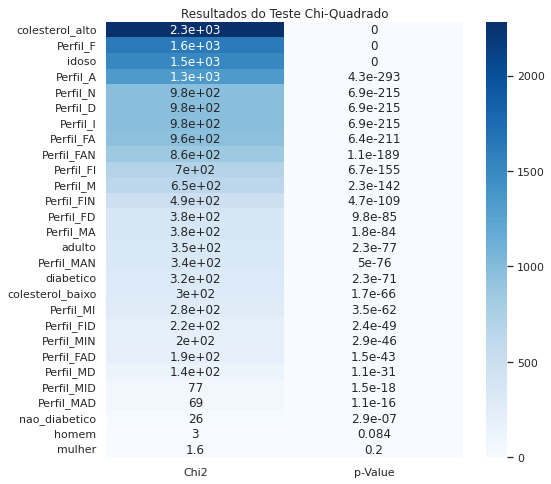

In [69]:
# Mapa de calor com os resultados do chi-quadrado
fig = plt.figure(figsize=(8,8))
sns.heatmap(perfil_sort.sort_values(by='Chi2', ascending=False), annot=True, cmap='Blues')
plt.title('Resultados do Teste Chi-Quadrado')
plt.show()